In [1]:
from UTILITY_quickstart import *

In [2]:
tao = initializeTao()

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-S2E
CSR off
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using /Users/nmajik/Documents/SLAC/FACET2-S2E/setLattice_configs/defaults.yml
WARNING! No beam file is specified!
Number of macro particles defined by input file
Beam created, written to /Users/nmajik/Documents/SLAC/FACET2-S2E/beams/activeBeamFile.h5, and reinit to tao


In [3]:
tao.cmd("show ele PR10571")

['Element # 124',
 'Element Name: PR10571',
 'Element Type:  "OTR"',
 'Element Alias:  "OTRS:IN10:571"',
 'Key: Monitor',
 'S_start, S:     14.236682,     14.236682',
 'Ref_time_start, Ref_time:  4.750496E-08,  4.750496E-08',
 '',
 'Attribute values [Only non-zero values shown]:',
 '   10  FRINGE_TYPE                 =  None (1)               11  FRINGE_AT                   =  Both_Ends (3)',
 '   13  SPIN_FRINGE_ON              =  T (1)',
 '   17  STATIC_LINEAR_MAP           =  F (0)',
 '   53  P0C                         =  1.2349894E+08 eV           BETA                        =  9.9999144E-01',
 '   54  E_TOT                       =  1.2350000E+08 eV           GAMMA                       =  2.4168347E+02',
 '   64  REF_TIME_START              =  4.7504960E-08 sec      50  DELTA_REF_TIME              =  0.0000000E+00 sec',
 '   67  DS_STEP                     =  2.0000000E-01 m        66  NUM_STEPS                   = 1',
 '',
 '       TRACKING_METHOD              =  Bmad_Standard  

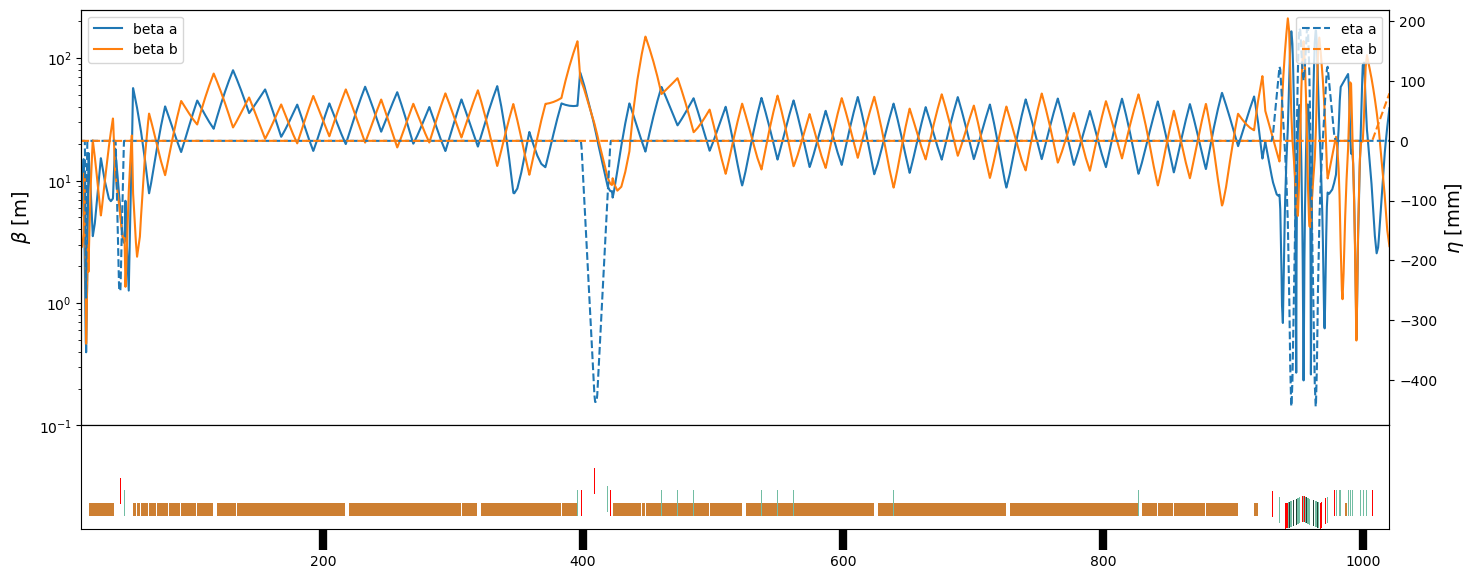

In [4]:
floorplanPlot(tao, zmin = 14.2)

In [5]:
importedDefaultSettings = loadConfig("setLattice_configs/2024-10-22_oneBunch_baseline2.yml")

csrTF = True
evalElement = "PENT"

inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
bunchCount = importedDefaultSettings["bunchCount"]

tao = initializeTao(
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    #numMacroParticles=1e4,
    scratchPath = "/tmp",
    randomizeFileNames = True
)

setLattice(tao, **importedDefaultSettings)
trackBeam(tao, **importedDefaultSettings)

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-S2E
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using /Users/nmajik/Documents/SLAC/FACET2-S2E/setLattice_configs/defaults.yml
Number of macro particles defined by input file
Beam created, written to /tmp/beams/activeBeamFile_2712418035821484662.h5, and reinit to tao


In [6]:
P = getBeamAtElement(tao, "PR10571")
P.write("/Users/nmajik/PR10571.h5")

In [7]:
getBeamSpecs(P, targetTwiss = "PR10571")

{'PDrive_median_x': np.float64(3.0024080891761135e-07),
 'PDrive_median_y': np.float64(-1.1960025188863174e-07),
 'PDrive_median_xp': np.float64(2.2249994925228626e-08),
 'PDrive_median_yp': np.float64(-1.2177939849954537e-07),
 'PDrive_median_energy': np.float64(123130883.27990435),
 'PDrive_sigmaSI90_x': np.float64(0.00033927316945640194),
 'PDrive_sigmaSI90_y': np.float64(0.00021076871988614764),
 'PDrive_sigmaSI90_z': np.float64(0.0005740772476799669),
 'PDrive_sigmaSI90_xp': np.float64(0.00015694879402786648),
 'PDrive_sigmaSI90_yp': np.float64(6.0038894875351064e-05),
 'PDrive_sigmaSI90_energy': np.float64(105386.80953798188),
 'PDrive_emitSI90_x': np.float64(4.853243691277861e-06),
 'PDrive_emitSI90_y': np.float64(3.0417639306976587e-06),
 'PDrive_norm_emit_x': np.float64(2.324662970234106e-06),
 'PDrive_norm_emit_y': np.float64(1.6988554586986035e-06),
 'PDrive_charge_nC': np.float64(1.6000000000000008),
 'PDrive_BMAG_x': np.float64(1.0143143122245917),
 'PDrive_BMAG_y': np.flo

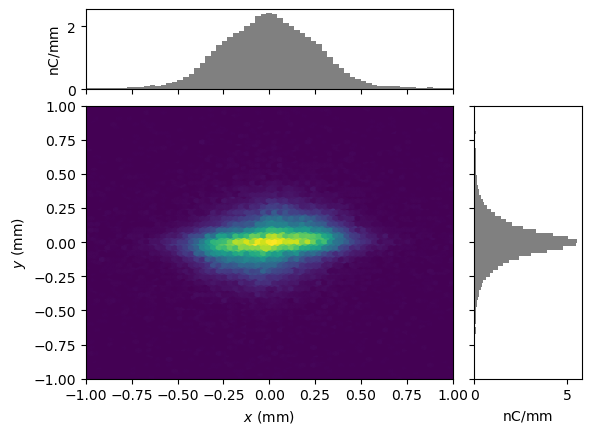

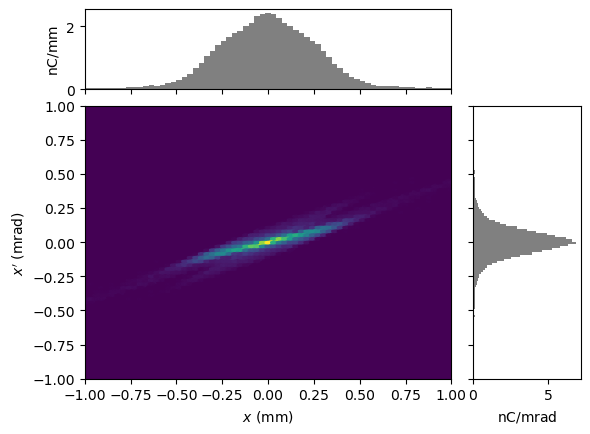

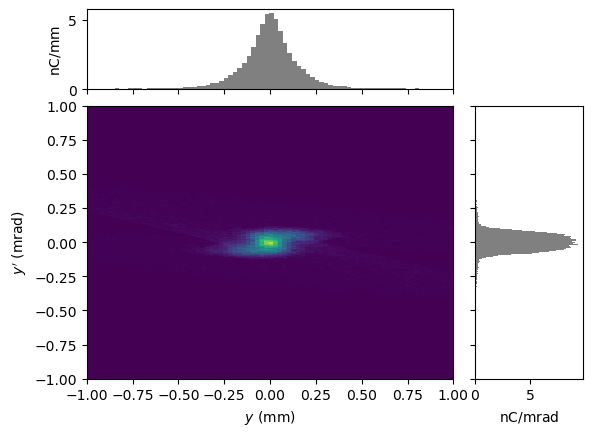

In [8]:
display(plotMod(P, 'x', 'y',  bins=300, xlim=(-1e-3,1e-3), ylim=(-1e-3,1e-3)))
display(plotMod(P, 'x', 'xp',  bins=300, xlim=(-1e-3,1e-3), ylim=(-1e-3,1e-3)))
display(plotMod(P, 'y', 'yp',  bins=300, xlim=(-1e-3,1e-3), ylim=(-1e-3,1e-3)))
plt.clf()

In [9]:
PActiveTwiss = P.twiss(plane = "x", fraction = 0.9) | P.twiss(plane = "y", fraction = 0.9)
PActiveTwiss

{'alpha_x': np.float64(-2.5094753161801426),
 'beta_x': np.float64(6.736651355530864),
 'gamma_x': np.float64(1.0832483347273314),
 'emit_x': np.float64(9.648059279671858e-09),
 'eta_x': np.float64(9.135573940222006e-05),
 'etap_x': np.float64(5.2622604768895e-05),
 'norm_emit_x': np.float64(2.324662970234106e-06),
 'alpha_y': np.float64(-0.12354799647849714),
 'beta_y': np.float64(2.6354920780528275),
 'gamma_y': np.float64(0.3852275314687932),
 'emit_y': np.float64(7.050846065008865e-09),
 'eta_y': np.float64(0.00028163769827529544),
 'etap_y': np.float64(-1.2840916339374675e-05),
 'norm_emit_y': np.float64(1.6988554586986035e-06)}

In [10]:
calcBMAG( 5.7, -2.1, PActiveTwiss["beta_x"], PActiveTwiss["alpha_x"] )

np.float64(1.0143143122245917)

## Plot tracked bunch length

In [11]:
totalNumElements = len(tao.lat_list("*", "ele.name"))
combinedElementData = [
    {
        "eleII" : eleII,
        "name" : tao.ele_head(eleII)["name"],
        "key" : tao.ele_head(eleII)["key"],
        "s" : tao.ele_head(eleII)["s"]
    }
    for eleII in range(totalNumElements) 
]

#Keep only elements after PR10571
combinedElementData = [ele for ele in combinedElementData if ele["s"] > 14.0]



allMarkerElements     = [ ele for ele in combinedElementData if ele["key"] == "Marker"   ]

In [12]:
allSValues = [ row["s"] for row in allMarkerElements ]
allBunchLengths = [ smallestIntervalImpliedSigma( getBeamAtElement(tao, row["eleII"]).z ) for row in allMarkerElements ]

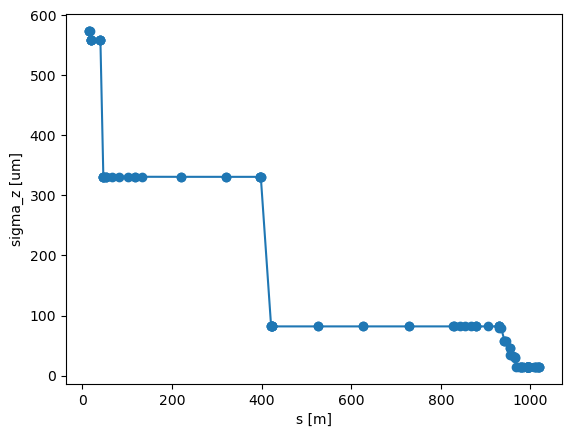

In [15]:
plt.plot(
    np.array(allSValues),
    1e6 * np.array(allBunchLengths),
    "o-"
)
#plt.title('Optimization History')
plt.xlabel('s [m]')
plt.ylabel("sigma_z [um]")
#plt.yscale("log")
plt.show()